In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn

In [2]:
wn.filterwarnings(action='ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [4]:
# importing the preprocessed dataset for model making
df_input = pd.read_csv('./h1b_for_model_making_02',index_col= None)

In [5]:
df_input

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,DATE,WAGE_CATERGORIZED
0,1373320,CERTIFIED,xenosoft technologies inc,IT Profession,Y,58011.0,2014.0,iowa,2014-01-01,MEDIUM
1,1926007,CERTIFIED,infosys limited,IT Profession,Y,70948.8,2013.0,california,2013-01-01,HIGH
2,1601710,CERTIFIED,tata consultancy services limited,IT Profession,Y,41558.0,2014.0,ohio,2014-01-01,MEDIUM
3,2417561,CERTIFIED,acxiom corporation,IT Profession,Y,47570.0,2012.0,arkansas,2012-01-01,MEDIUM
4,2420331,CERTIFIED,automotive robotics inc,Architecture & Engineering,Y,55598.0,2012.0,illinois,2012-01-01,MEDIUM
...,...,...,...,...,...,...,...,...,...,...
79577,3002354,DENIED,centers for disease control and preventiondhhs,Teaching,Y,33134.0,2011.0,ohio,2011-01-01,MEDIUM
79578,3002355,DENIED,iidya corporation,IT Profession,Y,43368.0,2011.0,oregon,2011-01-01,MEDIUM
79579,3002357,DENIED,iidya corporation,IT Profession,Y,46488.0,2011.0,texas,2011-01-01,MEDIUM
79580,3002365,DENIED,university of california santa cruz,Medical,Y,38496.0,2011.0,california,2011-01-01,MEDIUM


In [6]:
df_input.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'DATE',
       'WAGE_CATERGORIZED'],
      dtype='object')

In [7]:
df = df_input.drop('Unnamed: 0', axis=1)

In [8]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'FULL_TIME_POSITION',
       'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'DATE', 'WAGE_CATERGORIZED'],
      dtype='object')

In [9]:
# Encoding Categorical Data

In [10]:
encoding_cols = ['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'WORKSITE', 'FULL_TIME_POSITION', 'WAGE_CATERGORIZED']
# we will use label encoder for converting categorical columns to numerical columns

In [11]:
le_case_status = LabelEncoder()
le_case_status.fit(df['CASE_STATUS'])
df['CASE_STATUS_ENCODED'] = le_case_status.transform(df['CASE_STATUS'])

In [12]:
print(le_case_status.classes_)
print(df['CASE_STATUS_ENCODED'].unique())
print(df['CASE_STATUS_ENCODED'].nunique())

['CERTIFIED' 'DENIED']
[0 1]
2


In [13]:
ohe_col_empname = ['EMPLOYER_NAME']

In [14]:
ohe_emp_name = OneHotEncoder(handle_unknown='ignore')
ohe_emp_name.fit(df[['EMPLOYER_NAME']])

OneHotEncoder(handle_unknown='ignore')

In [15]:
emp_name_array = ohe_emp_name.transform(df[['EMPLOYER_NAME']]).toarray()

In [16]:
emp_name = list(ohe_emp_name.get_feature_names_out(ohe_col_empname))

In [17]:
emp_name_df = pd.DataFrame(data=emp_name_array, columns=emp_name)

In [18]:
emp_name_df.shape

(79582, 3485)

In [19]:
emp_name_df.head()

,EMPLOYER_NAME_22nd century technologies inc,EMPLOYER_NAME_3a soft inc,EMPLOYER_NAME_3core systems inc,EMPLOYER_NAME_3edgeusagroup llc,EMPLOYER_NAME_3i infotech inc,EMPLOYER_NAME_3k technologies llc,EMPLOYER_NAME_3m company,EMPLOYER_NAME_3s business corporation,EMPLOYER_NAME_3s network inc,EMPLOYER_NAME_3ved inc,...,EMPLOYER_NAME_zimmer inc,EMPLOYER_NAME_ziontech solutions inc,EMPLOYER_NAME_ziontech solutionsinc,EMPLOYER_NAME_zodiac solutions inc,EMPLOYER_NAME_zolon tech solutions inc,EMPLOYER_NAME_zs associates inc,EMPLOYER_NAME_zume it inc,EMPLOYER_NAME_zuven technologies inc,EMPLOYER_NAME_zylog systems limited,EMPLOYER_NAME_zynga inc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
le_soc_name = LabelEncoder()
le_soc_name.fit(df['SOC_NAME'])
df['SOC_NAME_ENCODED'] = le_soc_name.transform(df['SOC_NAME'])

In [21]:
print(le_soc_name.classes_)
print(df['SOC_NAME_ENCODED'].unique())
print(df['SOC_NAME_ENCODED'].nunique())

['Advance Science' 'Architecture & Engineering' 'Fashion & Entertainment'
 'Finance' 'Food & Service' 'IT Profession' 'Lawyer' 'Management'
 'Marketing' 'Mathematician' 'Medical' 'Others' 'Teaching' 'Technician'
 'actuaries' 'animal breeders' 'archivists'
 'atmospheric earth marine and space sciences tea'
 'business intelligence analysts' 'chiropractors'
 'compensation benefits and job analysis'
 'compensation benefits and job analysis specialis'
 'executive secretaries and administrative assistant'
 'executive secretaries and executive administrative'
 'firstline supervisors of construction trades and'
 'firstline supervisors of office and administrativ'
 'firstline supervisors of retail sales workers' 'geographers'
 'hairdressers hairstylists and cosmetologists' 'hydrologists'
 'internists general' 'librarians' 'mechanical drafters'
 'office and administrative support workers all oth'
 'operation research analysts' 'personnel recruiters'
 'plumbers pipefitters and steamfitters'
 'pro

In [22]:
le_worksite = LabelEncoder()
le_worksite.fit(df['WORKSITE'])
df['WORKSITE_ENCODED'] = le_worksite.transform(df['WORKSITE'])

In [23]:
print(le_worksite.classes_)
print(df['WORKSITE_ENCODED'].unique())
print(df['WORKSITE_ENCODED'].nunique())

['alabama' 'alaska' 'arizona' 'arkansas' 'california' 'colorado'
 'connecticut' 'delaware' 'districtofcolumbia' 'florida' 'georgia'
 'hawaii' 'idaho' 'illinois' 'indiana' 'iowa' 'kansas' 'kentucky'
 'louisiana' 'maine' 'maryland' 'massachusetts' 'michigan' 'minnesota'
 'mississippi' 'missouri' 'montana' 'na' 'nebraska' 'nevada'
 'newhampshire' 'newjersey' 'newmexico' 'newyork' 'northcarolina'
 'northdakota' 'ohio' 'oklahoma' 'oregon' 'pennsylvania' 'puertorico'
 'rhodeisland' 'southcarolina' 'southdakota' 'tennessee' 'texas' 'utah'
 'vermont' 'virginia' 'washington' 'westvirginia' 'wisconsin' 'wyoming']
[15  4 36  3 13 33 45 22 39 21 37 50 46 10  2  6  5  9 31 16 34 30  0 48
 44 25 51 18 43 17 23 42 14 40 49  8 41  7 20 29  1 19 38 47 11 28 24 12
 52 26 32 35 27]
53


In [24]:
le_fulltime = LabelEncoder()
le_fulltime.fit(df['FULL_TIME_POSITION'])
df['FULL_TIME_POSITION_ENCODED'] = le_fulltime.transform(df['FULL_TIME_POSITION'])

In [25]:
print(le_fulltime.classes_)
print(df['FULL_TIME_POSITION_ENCODED'].unique())
print(df['FULL_TIME_POSITION_ENCODED'].nunique())

['N' 'Y']
[1 0]
2


In [26]:
oe_wagecat = OrdinalEncoder(categories=[['LOW','MEDIUM','HIGH']], dtype=np.int64)
oe_wagecat.fit(df[['WAGE_CATERGORIZED']])
df['WAGE_ENCODED'] = oe_wagecat.transform(df[['WAGE_CATERGORIZED']])

In [27]:
print(oe_wagecat.categories)
print(df['WAGE_ENCODED'].unique())
print(df['WAGE_ENCODED'].nunique())

[['LOW', 'MEDIUM', 'HIGH']]
[1 2 0]
3


In [28]:
# we need to merge data frame horizontally with the one hot encoded dataframe of employer name

In [29]:
df_new = pd.concat([df, emp_name_df], axis=1)

In [30]:
df_new.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,DATE,WAGE_CATERGORIZED,CASE_STATUS_ENCODED,...,EMPLOYER_NAME_zimmer inc,EMPLOYER_NAME_ziontech solutions inc,EMPLOYER_NAME_ziontech solutionsinc,EMPLOYER_NAME_zodiac solutions inc,EMPLOYER_NAME_zolon tech solutions inc,EMPLOYER_NAME_zs associates inc,EMPLOYER_NAME_zume it inc,EMPLOYER_NAME_zuven technologies inc,EMPLOYER_NAME_zylog systems limited,EMPLOYER_NAME_zynga inc
0,CERTIFIED,xenosoft technologies inc,IT Profession,Y,58011.0,2014.0,iowa,2014-01-01,MEDIUM,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CERTIFIED,infosys limited,IT Profession,Y,70948.8,2013.0,california,2013-01-01,HIGH,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CERTIFIED,tata consultancy services limited,IT Profession,Y,41558.0,2014.0,ohio,2014-01-01,MEDIUM,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CERTIFIED,acxiom corporation,IT Profession,Y,47570.0,2012.0,arkansas,2012-01-01,MEDIUM,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CERTIFIED,automotive robotics inc,Architecture & Engineering,Y,55598.0,2012.0,illinois,2012-01-01,MEDIUM,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_new.shape

(79582, 3499)

In [32]:
df_new['CASE_STATUS'].value_counts()

CERTIFIED    55761
DENIED       23821
Name: CASE_STATUS, dtype: int64

,Feature,Chi_Square,P_val
0,FULL_TIME_POSITION_ENCODED,51.220268,0.0
1,SOC_NAME_ENCODED,781.323531,0.0
2,WORKSITE_ENCODED,42.401147,0.0
3,WAGE_ENCODED,46.044732,0.0


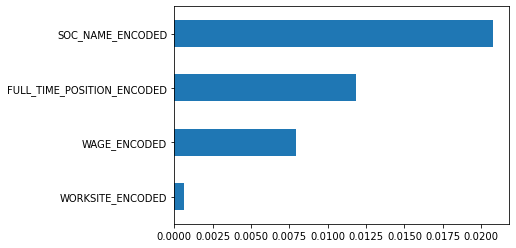

In [33]:
# using chi square test to check which categorical column is important with categorical output variable
# df.info()
from sklearn.feature_selection import mutual_info_classif
xchi = df_new[['FULL_TIME_POSITION_ENCODED','SOC_NAME_ENCODED','WORKSITE_ENCODED', 'WAGE_ENCODED']]
ychi = df_new['CASE_STATUS_ENCODED']
array = mutual_info_classif(xchi,ychi)
s1 = pd.Series(array)
s1.index = xchi.columns
s1.sort_values(ascending=True).plot(kind = 'barh')

# chi2
from sklearn.feature_selection import SelectKBest,chi2

best_features = SelectKBest(score_func=chi2,k = 'all')
best_features.fit(xchi,ychi)

df_chi2 = pd.DataFrame({'Feature':xchi.columns,"Chi_Square":best_features.scores_})
df_chi2.sort_values('Chi_Square',ascending=False)

chi2_score, p_val = chi2(xchi,ychi)
df_chi2 = pd.DataFrame({'Feature':xchi.columns,"Chi_Square":chi2_score,'P_val':np.around(p_val,5)})
df_chi2.sort_values('P_val')

In [34]:
# Since, from the Chi Square Test it is visible that the P Value for all the categorical columns is less than 0.05, hence
# all columns are important for model making

In [35]:
df_new.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,DATE,WAGE_CATERGORIZED,CASE_STATUS_ENCODED,...,EMPLOYER_NAME_zimmer inc,EMPLOYER_NAME_ziontech solutions inc,EMPLOYER_NAME_ziontech solutionsinc,EMPLOYER_NAME_zodiac solutions inc,EMPLOYER_NAME_zolon tech solutions inc,EMPLOYER_NAME_zs associates inc,EMPLOYER_NAME_zume it inc,EMPLOYER_NAME_zuven technologies inc,EMPLOYER_NAME_zylog systems limited,EMPLOYER_NAME_zynga inc
0,CERTIFIED,xenosoft technologies inc,IT Profession,Y,58011.0,2014.0,iowa,2014-01-01,MEDIUM,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CERTIFIED,infosys limited,IT Profession,Y,70948.8,2013.0,california,2013-01-01,HIGH,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CERTIFIED,tata consultancy services limited,IT Profession,Y,41558.0,2014.0,ohio,2014-01-01,MEDIUM,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CERTIFIED,acxiom corporation,IT Profession,Y,47570.0,2012.0,arkansas,2012-01-01,MEDIUM,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CERTIFIED,automotive robotics inc,Architecture & Engineering,Y,55598.0,2012.0,illinois,2012-01-01,MEDIUM,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df_new['CASE_STATUS_ENCODED'].value_counts()

0    55761
1    23821
Name: CASE_STATUS_ENCODED, dtype: int64

In [37]:
# using standard scaler for converting the values into standard normal range for faster convergence of model
from sklearn.preprocessing import StandardScaler
s_sc = StandardScaler()

In [38]:
df_new[['PREVAILING_WAGE']].ndim

2

In [39]:
s_sc.fit(df_new[['PREVAILING_WAGE']])
df_new['PREVAILING_WAGE_SCALED'] = s_sc.transform(df_new[['PREVAILING_WAGE']])

In [40]:
df_new.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'FULL_TIME_POSITION',
       'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'DATE', 'WAGE_CATERGORIZED',
       'CASE_STATUS_ENCODED',
       ...
       'EMPLOYER_NAME_ziontech solutions inc',
       'EMPLOYER_NAME_ziontech solutionsinc',
       'EMPLOYER_NAME_zodiac solutions inc',
       'EMPLOYER_NAME_zolon tech solutions inc',
       'EMPLOYER_NAME_zs associates inc', 'EMPLOYER_NAME_zume it inc',
       'EMPLOYER_NAME_zuven technologies inc',
       'EMPLOYER_NAME_zylog systems limited', 'EMPLOYER_NAME_zynga inc',
       'PREVAILING_WAGE_SCALED'],
      dtype='object', length=3500)

In [41]:
dropping_cols = ['PREVAILING_WAGE', 
                 'CASE_STATUS', 
                 'FULL_TIME_POSITION',
                 'EMPLOYER_NAME', 
                 'SOC_NAME', 
                 'WORKSITE', 
                 'YEAR', 
                 'DATE', 
                 'WAGE_CATERGORIZED']

In [42]:
dropping_cols

['PREVAILING_WAGE',
 'CASE_STATUS',
 'FULL_TIME_POSITION',
 'EMPLOYER_NAME',
 'SOC_NAME',
 'WORKSITE',
 'YEAR',
 'DATE',
 'WAGE_CATERGORIZED']

In [43]:
df_new.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,DATE,WAGE_CATERGORIZED,CASE_STATUS_ENCODED,...,EMPLOYER_NAME_ziontech solutions inc,EMPLOYER_NAME_ziontech solutionsinc,EMPLOYER_NAME_zodiac solutions inc,EMPLOYER_NAME_zolon tech solutions inc,EMPLOYER_NAME_zs associates inc,EMPLOYER_NAME_zume it inc,EMPLOYER_NAME_zuven technologies inc,EMPLOYER_NAME_zylog systems limited,EMPLOYER_NAME_zynga inc,PREVAILING_WAGE_SCALED
0,CERTIFIED,xenosoft technologies inc,IT Profession,Y,58011.0,2014.0,iowa,2014-01-01,MEDIUM,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.372412
1,CERTIFIED,infosys limited,IT Profession,Y,70948.8,2013.0,california,2013-01-01,HIGH,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.513339
2,CERTIFIED,tata consultancy services limited,IT Profession,Y,41558.0,2014.0,ohio,2014-01-01,MEDIUM,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.498822
3,CERTIFIED,acxiom corporation,IT Profession,Y,47570.0,2012.0,arkansas,2012-01-01,MEDIUM,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.087227
4,CERTIFIED,automotive robotics inc,Architecture & Engineering,Y,55598.0,2012.0,illinois,2012-01-01,MEDIUM,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.537611


In [44]:
df_final = df_new.drop(columns=['PREVAILING_WAGE', 'CASE_STATUS', 'FULL_TIME_POSITION',
       'EMPLOYER_NAME', 'SOC_NAME', 'WORKSITE', 'YEAR', 'DATE', 'WAGE_CATERGORIZED'], axis=1)

In [45]:
df_final['CASE_STATUS_ENCODED'].value_counts()

0    55761
1    23821
Name: CASE_STATUS_ENCODED, dtype: int64

In [46]:
'''
# we will do upsampling in our dataset as our dataset is imbalanced
from imblearn import over_sampling,under_sampling
from imblearn.over_sampling import SMOTE
from collections import Counter

X = df_final.drop(columns=['CASE_STATUS_ENCODED'], axis=1)

y = df_final['CASE_STATUS_ENCODED']

# Print the original class distribution
print("Original class distribution:", Counter(y))

# Instantiate the SMOTE algorithm
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the resampled class distribution
print("Resampled class distribution:", Counter(y_resampled))
'''

'\n# we will do upsampling in our dataset as our dataset is imbalanced\nfrom imblearn import over_sampling,under_sampling\nfrom imblearn.over_sampling import SMOTE\nfrom collections import Counter\n\nX = df_final.drop(columns=[\'CASE_STATUS_ENCODED\'], axis=1)\n\ny = df_final[\'CASE_STATUS_ENCODED\']\n\n# Print the original class distribution\nprint("Original class distribution:", Counter(y))\n\n# Instantiate the SMOTE algorithm\nsmote = SMOTE(sampling_strategy=\'auto\', random_state=42)\n\n# Apply SMOTE to generate synthetic samples\nX_resampled, y_resampled = smote.fit_resample(X, y)\n\n# Print the resampled class distribution\nprint("Resampled class distribution:", Counter(y_resampled))\n'

In [47]:
# we will use this resampled data from model making
# also we will see results with worksite dropped and present in the accuracy and then decide wether to use it or not

In [48]:
# X_resampled

In [49]:
# y_resampled

In [50]:
X = df_final.drop(columns=['CASE_STATUS_ENCODED'], axis=1)

In [51]:
y = df_final['CASE_STATUS_ENCODED']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123456789)

MemoryError: Unable to allocate 1.45 GiB for an array with shape (3486, 55707) and data type float64

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# For plotting roc graph & area under curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
def roc_curve_graph(X_test,y_test,model):
    preds = model.predict_proba(X_test) [:,1]
    #Compute Receiver operating characteristic (ROC) curve
    fpr, tpr, threshold = roc_curve(y_test, preds)
    #ROC Score
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
# Defining Evaluation metrics 
def evaluate_model(model):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

    y_true = y_test
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    # print("Confusion Matrix :\n")
    # print(confusion_matrix(y_test,y_pred))
    print(f"accuracy : {accuracy:0.2f}")
    print(f"precision : {precision:0.2f}")
    print(f"recall : {recall:0.2f}")
    print(f"f1 score : {f1:0.2f}")
    print(f"auc score : {auc:0.2f}")

In [ ]:
# Model 1, Logistic Regression Model

In [ ]:
model_logistic_regression = LogisticRegressionCV()

In [ ]:
model_logistic_regression.fit(X_train, y_train)

In [ ]:
model_logistic_regression.get_params()

In [ ]:
model_logistic_regression.score(X_test, y_test)

In [ ]:
evaluate_model(model_logistic_regression)

In [ ]:
roc_curve_graph(X_test,y_test,model_logistic_regression)

In [ ]:
# lets make model without the input column worksite and check the accuracy
X_without_worksite= X_resampled.drop(['WORKSITE_ENCODED'], axis = 1)

In [ ]:
X_without_worksite

In [ ]:
X_train_we, X_test_we, y_train_we, y_test_we = train_test_split(X_without_worksite,y_resampled, test_size=0.3)

In [ ]:
print(X_train_we.shape,X_test_we.shape,y_train_we.shape,y_test_we.shape)

In [ ]:
model_logistic_regression_without_worksite = LogisticRegressionCV(cv=5)

In [ ]:
model_logistic_regression_without_worksite.fit(X_train_we, y_train_we)

In [ ]:
model_logistic_regression_without_worksite.score(X_test_we,y_test_we)

In [ ]:
# since there is little change in accuracy we will consider the worksite column in our model

In [ ]:
LogisticRegressionCV()

In [ ]:
# hyper parameter tuning of logistic regression model
logistic_regression_grid = {
    'cv' : [3,4,5],
    'penalty' : ['l1', 'l2', 'elasticnet']
}

In [ ]:
grid_search_logistic_regression = GridSearchCV(estimator=model_logistic_regression,
                          param_grid = logistic_regression_grid,
                          n_jobs=-1,
                          verbose=4,
                          scoring='f1')

In [ ]:
grid_search_logistic_regression.fit(X_train,y_train)

In [ ]:
grid_search_logistic_regression.best_params_

In [ ]:
logistic_regression_best = grid_search_logistic_regression.best_estimator_

In [ ]:
evaluate_model(logistic_regression_best)

In [ ]:
roc_curve_graph(X_test, y_test, logistic_regression_best)

In [ ]:
# Model 2, Decision Tree Classifier
model_decission_tree = DecisionTreeClassifier()
model_decission_tree.fit(X_train, y_train)

In [ ]:
evaluate_model(model_decission_tree)

In [ ]:
roc_curve_graph(X_test,y_test,model_decission_tree)

In [ ]:
decission_tree_grid = {
    'criterion' : ['gini','entropy'],
    'splitter' : ['best','random'],
    'max_depth' : [4,6,8,10],
    'min_samples_split' : [2,4,6,8],
    'min_samples_leaf' : [2,3,4,5]
}

In [ ]:
grid_search_decission_tree = GridSearchCV(estimator=model_decission_tree,
                          param_grid=decission_tree_grid,
                          cv = 4,
                          n_jobs=-1,
                          verbose=4,
                          scoring='f1')

In [ ]:
grid_search_decission_tree.fit(X_train,y_train)

In [ ]:
grid_search_decission_tree.best_estimator_

In [ ]:
decission_tree_best = grid_search_decission_tree.best_estimator_

In [ ]:
evaluate_model(decission_tree_best)

In [ ]:
roc_curve_graph(X_test, y_test, decission_tree_best)

In [ ]:
# Model 3, Random Forest Classifier
model_random_forest = RandomForestClassifier()
model_random_forest.fit(X_train, y_train)

In [ ]:
evaluate_model(model_random_forest)

In [ ]:
roc_curve_graph(X_test, y_test, model_random_forest)

In [ ]:
random_forest_grid = {
    'criterion' : ['gini'],
    'max_depth' : [4,6,8],
    'min_samples_split' : [2,4,6,8],
    'min_samples_leaf' : [2,3,4],
    'n_estimators' : [50,75,100]
}

In [ ]:
grid_search_random_forest = GridSearchCV(estimator=model_random_forest,
                          param_grid=random_forest_grid,
                          cv = 4,
                          n_jobs=-1,
                          verbose=3,
                          scoring='f1')

In [ ]:
grid_search_random_forest.fit(X_train,y_train)

In [ ]:
random_forest_best = grid_search_random_forest.best_estimator_
evaluate_model(random_forest_best)

In [ ]:
roc_curve_graph(X_test, y_test, random_forest_best)

In [ ]:
# Model 4, Gradient Boosting Classifier
model_gradboost = GradientBoostingClassifier()
model_gradboost.fit(X_train, y_train)

In [ ]:
evaluate_model(model_gradboost)

In [ ]:
roc_curve_graph(X_test,y_test, model_gradboost)

In [ ]:
# Model 5, ada Boosting Classifier
model_adaboost = AdaBoostClassifier()
model_adaboost.fit(X_train, y_train)

In [ ]:
evaluate_model(model_adaboost)

In [ ]:
roc_curve_graph(X_test,y_test, model_adaboost)

In [ ]:
# Model 6, XG Boost Classifier
from xgboost import XGBClassifier
model_xgboost = XGBClassifier()
model_xgboost.fit(X_train, y_train)

In [ ]:
evaluate_model(model_xgboost)

In [ ]:
roc_curve_graph(X_test, y_test, model_xgboost)

In [ ]:
models = [logistic_regression_best, decision_tree_best, random_forest_best, model_gradboost, model_adaboost, model_xgboost]

In [ ]:
for model in models:
    print(f'{model}')
    evaluate_model(model)
    print()

In [ ]:
print(X_train.shape)
print(X_train.iloc[2].shape) # this will be the input shape to our ann model

In [ ]:
import math
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical #for converting our y data ie from alphabets a-z to catergorical form
from tensorflow.keras.models import Sequential 
#for creating sequential model of different dense layers,all layers together make sequential model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten 
#for creating layers of training, dense means connected to each other, Conv2d,maxpool2d,flattern for cnn transfer ler model
#for creating layers of training, dense means connected to each other, Conv2d,maxpool2d,flattern for cnn transfer lerning model
from tensorflow.keras.losses import binary_crossentropy

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.densenet import DenseNet201

In [ ]:
#ann model
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape=(6,))) #trainable parameters = 6x32 + 32 bias
model.add(Dense(32, activation = 'relu')) #trainable parameters = 32x32 + 32 bias
model.add(Dense(1, activation = 'softmax')) #trainable parameters = 32x26 + 26 bias

model.compile(loss='binary_crossentropy', metrics=['accuracy']) 
#the parameters whcih are common to whole model need to be given in compile line code
#common parametrs are loss function, optimizer, metrics used for our model
#each layer can have diff numbers of neuron and diff activation function & diff kernel initializers

In [ ]:
model.summary()

In [ ]:
import time

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='loss', verbose=1,patience=3)
#Stops training when a monitored metric has stopped improving, checking 3 recent loss and accuracy improvement

In [ ]:
init = time.time()
ann_model = model.fit(X_train,y_train, epochs = 100, batch_size=32,verbose=0,callbacks=es) #mini batch gd, value should be in power of 2
end = time.time()
print('Training Time is:',int(end-init))
#returns the epoch where training has stopped

In [ ]:
plt.plot(ann_model.history['loss'],marker='o') 
#this plots the loss function graph for mini batch gd
#as we can observe that the loss after a certain pt is increasing so we need to stop training our model at that point
#this can be achived by the callback parameter and earlystopping

In [ ]:
ann_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, ann_pred))
print(precision_score(y_test,ann_pred))
print(recall_score(y_test, ann_pred))
print(f1_score(y_test, ann_pred))

In [ ]:
# lets try transfer learning in our model with vgg16, resnet50, inceptionv3 & DenseNet201

In [ ]:
# vgg_model = VGG16(include_top=False, input_shape=(6,))
# resnet_model = ResNet50(include_top=False, input_shape=(6,))
# InceptionV3_model = InceptionV3(include_top=False, input_shape=(6,))
# DenseNet201_model = DenseNet201(include_top=False, input_shape=(6,))

In [ ]:
import kerastuner as kt

In [ ]:
def build_model(hp):
  model = tf.keras.Sequential()
  
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
  hp_units2 = hp.Int('units2', min_value=32, max_value=512, step=32)
  hp_units3 = hp.Int('units3', min_value=32, max_value=512, step=32)
  model.add(Dense(units=hp_units1, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units2, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units3, activation='relu'))
  model.add(Dense(1, kernel_initializer='normal', activation='linear'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
      loss=binary_crossentropy,
      metrics=['accuracy']
  )

  return model

In [ ]:
# HyperBand algorithm from keras tuner
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='h1b')

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])

In [ ]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model = tuner.hypermodel.build(best_hps)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

In [ ]:
hypermodel_pred = hypermodel.predict(X_test)

In [ ]:
eval_result = hypermodel.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

In [ ]:
# hence comparing all the accuracies we come to know that the best model is decision tree we will use that as final model

In [ ]:
import pickle
pickle.dump(model_xgb, open('model_xgb.pkl', 'wb'))

In [ ]:
pickle.dump(le_emp_name, open('le_emp_name.pkl', 'wb'))
pickle.dump(le_soc_name, open('le_soc_name.pkl', 'wb'))
pickle.dump(le_worksite, open('le_worksite.pkl', 'wb'))
pickle.dump(s_sc, open('s_sc.pkl', 'wb'))

In [ ]:
df_input.columns

In [ ]:
df_input['EMPLOYER_NAME'].unique()

In [ ]:
df_input['SOC_NAME'].unique()

In [ ]:
df_input['WORKSITE'].unique()

In [ ]:
X_test

In [ ]:
df_input['PREVAILING_WAGE']

In [ ]:
# Trying the prediction from constructed input
pred = (40000, 'Y', 'tata consultancy services limited', 'IT Profession', 'california')

In [ ]:
import numpy as np
x=np.array([pred])
x

In [ ]:
def encode_full_time_position(x):
    return 1 if x == 'Y' else 0

In [ ]:
encode_full_time_position('N')

In [ ]:
x[:,1] = encode_full_time_position(x[:,1])
x[:,2] = le_emp_name.transform(x[:,2])
x[:,3] = le_soc_name.transform(x[:,3])
x[:,4] = le_worksite.transform(x[:,4])

In [ ]:
x = x.astype(float)
x

In [ ]:
prediction = model_xgb.predict(x)

In [ ]:
prediction

In [ ]:
df[(df_input['PREVAILING_WAGE'] > 39500) & (df_input['PREVAILING_WAGE'] < 40500)]

In [ ]:
pred = (40290, 'Y', 'other', 'Medical', 'massachusetts')

In [ ]:
import numpy as np
x=np.array([pred])
x

In [ ]:
x[:,1] = encode_full_time_position(x[:,1])
x[:,2] = le_emp_name.transform(x[:,2])
x[:,3] = le_soc_name.transform(x[:,3])
x[:,4] = le_worksite.transform(x[:,4])

In [ ]:
x = x.astype(float)
x

In [ ]:
prediction = model_xgb.predict(x)

In [ ]:
prediction